# Project_2_H2O_GLM-

J_C

# Load dataset

In [2]:
import numpy as np  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [4]:
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels


In [5]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))     

In [6]:
data = pd.read_csv('SBA_loans_project_2(1).zip')

In [7]:
print("Data shape:", data.shape)        

Data shape: (807450, 21)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807450 entries, 0 to 807449
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              807450 non-null  int64  
 1   City               807424 non-null  object 
 2   State              807437 non-null  object 
 3   Zip                807450 non-null  int64  
 4   Bank               806103 non-null  object 
 5   BankState          806097 non-null  object 
 6   NAICS              807450 non-null  int64  
 7   NoEmp              807450 non-null  int64  
 8   NewExist           807328 non-null  float64
 9   CreateJob          807450 non-null  int64  
 10  RetainedJob        807450 non-null  int64  
 11  FranchiseCode      807450 non-null  int64  
 12  UrbanRural         807450 non-null  int64  
 13  RevLineCr          803360 non-null  object 
 14  LowDoc             805159 non-null  object 
 15  DisbursementGross  807450 non-null  object 
 16  Ba

In [9]:
desc_df = describe_more(data)
desc_df 


,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,index,807450,int64,1,6,"{0: 1, 538292: 1, 538294: 1, 538295: 1, 538296..."
1,City,31282,object,1,30,"{'LOS ANGELES': 10411, 'HOUSTON': 9199, 'NEW Y..."
2,State,51,object,2,3,"{'CA': 117588, 'TX': 63276, 'NY': 51662, 'FL':..."
3,Zip,32684,int64,1,5,"{90015: 859, 10001: 828, 93401: 686, 90010: 65..."
4,Bank,5723,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 78084, 'WELLS F..."
5,BankState,56,object,2,3,"{'CA': 106262, 'NC': 71538, 'IL': 59243, 'OH':..."
6,NAICS,1308,int64,1,6,"{0: 181513, 722110: 25135, 722211: 17482, 8111..."
7,NoEmp,572,int64,1,4,"{1: 137896, 2: 124295, 3: 81375, 4: 66150, 5: ..."
8,NewExist,3,float64,3,3,"{1.0: 579047, 2.0: 227352, 0.0: 929}"
9,CreateJob,240,int64,1,4,"{0: 564999, 1: 56654, 2: 51866, 3: 25911, 4: 1..."


Data preprocessing:cleaning

In [10]:
#Deleting duplicates if any
data= data.drop_duplicates(keep = 'first')

data.shape

#no duplicates

(807450, 21)

In [11]:
data["LowDoc"].fillna( method ='ffill', inplace = True)

In [12]:
data.isna().sum()

index                   0
City                   26
State                  13
Zip                     0
Bank                 1347
BankState            1353
NAICS                   0
NoEmp                   0
NewExist              122
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4090
LowDoc                  0
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
LoanInd                 0
MIS_Status              0
dtype: int64

Lets ck individual variables:RevLineCr,LowDoc,NewExist 

In [13]:
data.LowDoc.unique()

array(['N', 'Y', 'S', 'C', '0', 'R', 'A', '1'], dtype=object)

In [14]:
# Create third column for values
data.loc[(data['LowDoc'] == "C"), 'LowDoc'] = "O"

data.loc[(data['LowDoc'] == "S"), 'LowDoc'] = "O"
data.loc[(data['LowDoc'] == "0"), 'LowDoc'] = "O"

data.loc[(data['LowDoc'] == "A"), 'LowDoc'] = "O"
data.loc[(data['LowDoc'] == "R"), 'LowDoc'] = "O"
data.loc[(data['LowDoc'] == "1"), 'LowDoc'] = "O"

data['LowDoc'].value_counts()

N    704835
Y     99535
O      3080
Name: LowDoc, dtype: int64

Low Doc Columns: After checking LowDoc there are some value that not defined as 'N' or 'Y'. That codes are C,S,A,R,and0 which are not defined and dont know what that code means. Because of the number of that values are not too much (could see on the cell below). So, I decided to label as another variable as "O" ; If data willl have enough records after cleaning, will drop this "o" column.

In [15]:
data['LowDoc'].value_counts()

N    704835
Y     99535
O      3080
Name: LowDoc, dtype: int64

In [16]:
data= data[data['LowDoc']!="O"]

In [17]:
data['LowDoc'].value_counts()

N    704835
Y     99535
Name: LowDoc, dtype: int64

In [18]:
data['LowDoc'] = [1 if status == 'Y' else 0 for status in data.LowDoc.values] 

In [19]:
data['LowDoc'].value_counts()

0    704835
1     99535
Name: LowDoc, dtype: int64

RevLineCr: As per data description,revolving line of credit= Y Or N, this variable other undefined column so will make another columnn those recoreds as "o".

In [20]:
data['RevLineCr'].value_counts()

N    375438
0    231110
Y    180193
T     13711
1        19
R        13
`        10
2         5
,         1
7         1
4         1
A         1
.         1
Q         1
-         1
C         1
5         1
3         1
Name: RevLineCr, dtype: int64

In [21]:
data.loc[(data['RevLineCr'] == "0"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "R"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "1"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "2"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "T"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "`"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "C"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "."), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "-"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "7"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "A"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "Q"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "5"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "3"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == ","), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "4"), 'RevLineCr'] = "O"

I will use same approch for this variable as well, will drop this new column records.

In [22]:
data['RevLineCr'].value_counts()

N    375438
O    244878
Y    180193
Name: RevLineCr, dtype: int64

In [23]:
data["RevLineCr"].fillna( method ='ffill', inplace = True)

In [24]:
data['RevLineCr'].value_counts()

N    377208
O    246054
Y    181108
Name: RevLineCr, dtype: int64

In [25]:
data['RevLineCr'].value_counts()

N    377208
O    246054
Y    181108
Name: RevLineCr, dtype: int64

In [26]:
data= data[data['RevLineCr']!="O"]

Lets assign labels to column so no need of encoding

In [27]:
data['RevLineCr'] = [1 if status == 'Y' else 0 for status in data.RevLineCr.values] 


In [28]:
data['RevLineCr'].value_counts()

0    377208
1    181108
Name: RevLineCr, dtype: int64

In [29]:
data['NewExist'].unique()

array([ 2.,  1.,  0., nan])

In [30]:
data["NewExist"].fillna( method ='ffill', inplace = True)

In [31]:
# Keep records where NewExist == 1 or 2
data = data[(data['NewExist'] == 1) | (data['NewExist'] == 2)]


In [32]:
data['NewExist'].unique()

array([2., 1.])

In [33]:
#Filling the Null values with "Missing" and "0"
values_to_fill = {}
for col in data:
    if data[col].dtype == 'object':
        values_to_fill[col] = "Missing"
    else:
        values_to_fill[col] = 0

data.fillna(value=values_to_fill,inplace=True)
data.fillna(value=values_to_fill, inplace=True)

In [34]:
data.isna().sum()

index                0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
LoanInd              0
MIS_Status           0
dtype: int64

In [35]:
data.FranchiseCode.unique()

array([    1,     0, 30215, ..., 26600,  6300, 99999], dtype=int64)

From table information we know that Franchise code, (00000 or 00001) = Nofranchise. So I decided to separate the Franchise to be :

FranchiseCode = 1 (have franchise) FranchiseCode = 0 (no franchise)

In [36]:
def new_franchise(x):
    if (x == 1) | (x == 0):
        return 0
    else :
        return 1

data['FranchiseCode'] = data['FranchiseCode'].apply(lambda x: new_franchise(x))

In [37]:
data.FranchiseCode.unique()

array([0, 1], dtype=int64)

In [38]:
data[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,GrAppv,SBA_Appv
0,"$114,577.00",$0.00,"$114,577.00","$85,933.00"
1,"$25,000.00",$0.00,"$25,000.00","$12,500.00"
3,"$230,000.00",$0.00,"$230,000.00","$195,500.00"
4,"$32,000.00",$0.00,"$32,000.00","$16,000.00"
5,"$150,000.00",$0.00,"$150,000.00","$112,500.00"


In [39]:
def currencyCleaning(x):
    x = x[1:].replace(',','')
    return x

In [40]:
data['DisbursementGross'] = data['DisbursementGross'].apply(currencyCleaning).astype(float).astype(int)
data['SBA_Appv'] = data['SBA_Appv'].apply(currencyCleaning).astype(float).astype(int)
data['BalanceGross'] = data['BalanceGross'].apply(currencyCleaning).astype(float).astype(int)
data['GrAppv'] = data['GrAppv'].apply(currencyCleaning).astype(float).astype(int)

In [41]:
data[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,GrAppv,SBA_Appv
0,114577,0,114577,85933
1,25000,0,25000,12500
3,230000,0,230000,195500
4,32000,0,32000,16000
5,150000,0,150000,112500


In [42]:
desc_df1 = describe_more(data)
desc_df1


,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,index,557449,int64,1,6,"{0: 1, 538309: 1, 538302: 1, 538304: 1, 538305..."
1,City,27530,object,1,30,"{'LOS ANGELES': 6283, 'HOUSTON': 5238, 'NEW YO..."
2,State,52,object,2,7,"{'CA': 73635, 'NY': 39468, 'TX': 38614, 'FL': ..."
3,Zip,29439,int64,1,5,"{10001: 631, 90015: 614, 90010: 510, 33166: 44..."
4,Bank,5393,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 62304, 'WELLS F..."
5,BankState,56,object,2,7,"{'NC': 57307, 'CA': 54890, 'IL': 46779, 'OH': ..."
6,NAICS,1302,int64,1,6,"{0: 140298, 722110: 12939, 811111: 8726, 72221..."
7,NoEmp,513,int64,1,4,"{1: 93095, 2: 83372, 3: 54983, 4: 45034, 5: 36..."
8,NewExist,2,float64,3,3,"{1.0: 406074, 2.0: 151375}"
9,CreateJob,215,int64,1,4,"{0: 410243, 1: 36587, 2: 31331, 3: 14817, 4: 1..."


In [43]:
desc_df1.iloc[[7,11,12,13,18]]["Level_Values"]

7     {1: 93095, 2: 83372, 3: 54983, 4: 45034, 5: 36...
11                                {0: 533857, 1: 23592}
12                     {1: 266838, 0: 231451, 2: 59160}
13                               {0: 376373, 1: 181076}
18    {25000: 36441, 12500: 30783, 5000: 24256, 5000...
Name: Level_Values, dtype: object

In [44]:
desc_df1.iloc[5]["Level_Values"]            

{'NC': 57307,
 'CA': 54890,
 'IL': 46779,
 'OH': 40203,
 'RI': 32680,
 'SD': 31101,
 'NY': 26301,
 'TX': 24729,
 'VA': 18988,
 'DE': 14845,
 'UT': 12765,
 'MN': 10874,
 'WI': 10114,
 'PA': 9820,
 'MO': 9724,
 'MA': 8875,
 'GA': 8734,
 'AL': 8698,
 'FL': 8554,
 'IA': 6680,
 'OR': 6550,
 'WA': 6384,
 'KS': 5998,
 'CO': 5597,
 'MT': 5446,
 'CT': 5435,
 'OK': 4672,
 'MI': 4606,
 'IN': 4574,
 'NH': 4486,
 'AR': 4461,
 'MD': 4385,
 'MS': 4111,
 'NJ': 3852,
 'TN': 3688,
 'ND': 3589,
 'VT': 3428,
 'LA': 3221,
 'SC': 3192,
 'NE': 3108,
 'NM': 2935,
 'KY': 2759,
 'ID': 2756,
 'NV': 2408,
 'ME': 2353,
 'AZ': 1865,
 'DC': 1851,
 'HI': 1675,
 'WY': 1494,
 'WV': 1367,
 'Missing': 1333,
 'AK': 1110,
 'PR': 95,
 'GU': 2,
 'EN': 1,
 'AN': 1}

Upon observing NAICS level values we see that NAICS is a six digit numeric code.

So, we remove all the data with incomplete NAICS code is zero

In [45]:
data[data['NAICS']==0]

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status
3,3,GRAND PRAIRIE,TX,75050,PROSPERITY BANK,TX,0,18,1.0,0,0,0,0,0,0,230000,0,230000,195500,5,0
10,10,LITTLE ROCK,AR,72205,REGIONS BANK,AR,0,3,1.0,0,0,0,0,0,1,100000,0,100000,90000,6,0
26,26,BILLINGS,MT,59101,UNITED BANK,MT,0,20,1.0,0,0,0,0,0,0,360000,0,360000,270000,5,0
38,38,MAPLE GROVE,MN,55369,WELLS FARGO BANK NATL ASSOC,SD,0,3,1.0,0,0,0,0,0,0,139500,0,139500,125550,2,0
46,46,BISHOP,CA,93514,FDIC/MONCOR BANK,CA,0,5,1.0,0,0,0,0,0,0,125000,0,125000,110375,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807430,807430,EL CENTRO,CA,92243,COMM. INDUST DEELOPMENT,CA,0,10,1.0,2,8,0,0,0,0,125000,0,125000,125000,7,0
807441,807441,WEST DES MOINES,IA,50265,IOWA STATE BANK,IA,0,9,1.0,0,0,0,0,0,1,80000,0,80000,64000,5,0
807442,807442,SAN CARLO,CA,94065,WELLS FARGO BANK NATL ASSOC,SD,0,16,1.0,0,0,1,0,0,0,245000,0,245000,196000,5,0
807445,807445,GRAND FORKS,ND,58208,FRANDSEN BANK & TRUST,ND,0,41,1.0,0,0,0,0,0,0,90000,0,90000,81000,7,0


In [46]:
data.NAICS
NAICSTrue = 0
NAICSFalse = 0
for i in data.NAICS.astype(str):
    if len(i) == 6:
        NAICSTrue += 1
    else:
        NAICSFalse += 1
print(NAICSTrue)
print(NAICSFalse)

417151
140298


In [47]:
data = data[data.NAICS != 0]           

In [48]:
#make copy of cleaned data frame for H2O model
df=data.copy()

In [49]:
df.head(2)

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status
0,0,PRINCETON,MN,55371,PEOPLES BANK OF COMMERCE,MN,441120,4,2.0,0,0,0,0,0,0,114577,0,114577,85933,1,0
1,1,Kansas city,MO,64116,BANK OF HAYS,KS,481111,14,1.0,0,14,0,1,0,0,25000,0,25000,12500,7,0


Done with data-cleaning.

# GBM (H2O)

Loding data

In [50]:
import h2o

In [51]:
import pandas as pd
import numpy as np
import os

In [52]:
h2o.init(nthreads=10,min_mem_size=2,max_mem_size=8)        

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM 18.9 (build 11+28, mixed mode)
  Starting server from C:\spring-2023\ml-spring-2023\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\BA\AppData\Local\Temp\tmpqbio25wf
  JVM stdout: C:\Users\BA\AppData\Local\Temp\tmpqbio25wf\h2o_BA_started_from_python.out
  JVM stderr: C:\Users\BA\AppData\Local\Temp\tmpqbio25wf\h2o_BA_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,4 months and 1 day !!!
H2O_cluster_name:,H2O_from_python_BA_8zrjhl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [53]:
h2o.remove_all() 

# Loading data

In [54]:
## Convert Pandas data frame into H2O data frame
df_h = h2o.H2OFrame(df)
df_h.head(5)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status
0,PRINCETON,MN,55371,PEOPLES BANK OF COMMERCE,MN,441120,4,2,0,0,0,0,0,0,114577,0,114577,85933,1,0
1,Kansas city,MO,64116,BANK OF HAYS,KS,481111,14,1,0,14,0,1,0,0,25000,0,25000,12500,7,0
4,EL PASO,TX,79925,WESTSTAR BANK,TX,423220,4,1,0,4,0,1,0,0,32000,0,32000,16000,9,0
5,NASHUA,IA,50658,FIRST NATIONAL BANK,IA,541940,9,1,0,0,0,0,0,0,150000,0,150000,112500,7,0
6,DOVER,DE,19904,WILMINGTON SAVINGS FUND SOCIET,DE,235950,3,2,1,2,0,2,1,0,90317,0,35000,17500,7,0


As I performed all data cleaning so converted pandas data frame to H2O frame.
I will perform target encoding then will split data to train, test and valid.


# Data Splitting_ Train,test,valid

In [55]:
# split into training and validation
train,valid, test = df_h.split_frame([0.7,0.15], seed=12345)

# summarize split
print('Train data rows = %d, columns = %d' % (train.shape[0], train.shape[1]))
print('valid data rows = %d, columns = %d' % (valid.shape[0], valid.shape[1]))
print('Test data rows = %d, columns = %d' % (test.shape[0], test.shape[1]))

Train data rows = 292135, columns = 21
valid data rows = 62485, columns = 21
Test data rows = 62532, columns = 21


# Encoding categorical columns

In [162]:
from h2o.estimators import H2OTargetEncoderEstimator
# Choose which columns to encode
cat_columns = ["City","State","Bank","BankState"]
response = "MIS_Status"

train[cat_columns+[response]] = train[cat_columns+[response]].asfactor()

# Train a Target Encoder model
data_te = H2OTargetEncoderEstimator(#fold_column=fold_column,
                                    data_leakage_handling=None,
                                    blending=True,
                                    inflection_point=3,
                                    smoothing=10,
                                    noise=0.15,     # In general, the less data you have the more regularization you need
                                    seed=1234)

data_te.train(x=cat_columns,
              y=response,
              training_frame=train)

# New target encoded dataset
train = data_te.transform(frame=train, as_training=True)
test = data_te.transform(frame=test, as_training=False)
valid= data_te.transform(frame=valid, as_training=False)
predictors = train.columns
for col in cat_columns+[response]:
    predictors.remove(col)

targetencoder Model Build progress: |████████████████████████████████████████████| (done) 100%


Add engineered features:

we added target-encoded features.

category-encoding: as we know GBM-estimator take care of this feature so not make sense perform now.
pca- reducing dimention not helping much raise accuracy; for this particular case interpretation diffcult with pca.
I decided to scale data- standard scaling. With H2O this feature is not possible for GBM model but can be possible with some other estimator like GLM.





# Add engineered features

In [163]:
def cut_column(train_df, train, valid, test, col):
    '''
    Convenience function to change a column from numerical to categorical
    We use train_df only for bucketing with histograms.
    Uses np.histogram to generate a histogram, with the buckets forming the categories of our new categorical.
    Picks buckets based on training data, then applies the same classification to the test and validation sets
    
    Assumes that train, valid, test will have the same histogram behavior.
    '''
    only_col= train_df[col]                            #Isolate the column in question from the training frame
    counts, breaks = np.histogram(only_col, bins=20)   #Generate counts and breaks for our histogram
    min_val = min(only_col)-1                          #Establish min and max values
    max_val = max(only_col)+1
    
    new_b = [min_val]                                  #Redefine breaks such that each bucket has enough support
    for i in range(19):
        if counts[i] > 1000 and counts[i+1] > 1000:
            new_b.append(breaks[i+1])
    new_b.append(max_val)
    
    names = [col + '_' + str(x) for x in range(len(new_b)-1)]  #Generate names for buckets, these will be categorical names

    train[col+"_cut"] = train[col].cut(breaks=new_b, labels=names)
    valid[col+"_cut"] = valid[col].cut(breaks=new_b, labels=names)
    test[col+"_cut"] = test[col].cut(breaks=new_b, labels=names)


In [164]:
def add_features(train, valid, test):
    '''
    Helper function to add a specific set of features to our covertype dataset
    '''
    #pull train dataset into Python
    train_df = train.as_data_frame(True)
    
    #Make categoricals for several columns
    cut_column(train_df, train, valid, test, "UrbanRural")
    cut_column(train_df, train, valid, test, "RevLineCr")
    cut_column(train_df, train, valid, test, "FranchiseCode")
    cut_column(train_df, train, valid, test, "LowDoc")
    cut_column(train_df, train, valid, test, "NewExist")
    cut_column(train_df, train, valid, test, "RetainedJob")
    cut_column(train_df, train, valid, test, "CreateJob")
    
    
    #Add interaction columns for a subset of columns
    interaction_cols1 = ["UrbanRural_cut",
                         "BankState",
                         "State",
                         "RevLineCr_cut",
                         "FranchiseCode_cut",
                         "LowDoc_cut",
                         "RetainedJob_cut",
                         "NewExist_cut",
                         "CreateJob_cut"]

    train_cols = train.interaction(factors=interaction_cols1,    #Generate pairwise columns
                                   pairwise=True,
                                   max_factors=1000,
                                   min_occurrence=100,
                                   destination_frame="itrain")
    valid_cols = valid.interaction(factors=interaction_cols1,
                                   pairwise=True,
                                   max_factors=1000,
                                   min_occurrence=100,
                                   destination_frame="ivalid")
    test_cols = test.interaction(factors=interaction_cols1,
                                   pairwise=True,
                                   max_factors=1000,
                                   min_occurrence=100,
                                   destination_frame="itest")
    
    train = train.cbind(train_cols)                              #Append pairwise columns to H2OFrames
    valid = valid.cbind(valid_cols)
    test = test.cbind(test_cols)
    
    
    #Add a three-way interaction for Hillshade
    interaction_cols2 = ["NewExist_cut","RetainedJob_cut","CreateJob_cut"]
    
    train_cols = train.interaction(factors=interaction_cols2,    #Generate pairwise columns
                                   pairwise=False,
                                   max_factors=1000,
                                   min_occurrence=100,
                                   destination_frame="itrain")
    valid_cols = valid.interaction(factors=interaction_cols2,
                                   pairwise=False,
                                   max_factors=1000,
                                   min_occurrence=100,
                                   destination_frame="ivalid")
    test_cols = test.interaction(factors=interaction_cols2,
                                   pairwise=False,
                                   max_factors=1000,
                                   min_occurrence=100,
                                   destination_frame="itest")
    
    train = train.cbind(train_cols)                              #Append pairwise columns to H2OFrames
    valid = valid.cbind(valid_cols)
    test = test.cbind(test_cols)
    
    return train, valid, test

In [165]:
train_bf, valid_bf, test_bf = add_features(train, valid, test)

Interactions progress: |█████████████████████████████████████████████████████████| (done) 100%
Interactions progress: |█████████████████████████████████████████████████████████| (done) 100%
Interactions progress: |█████████████████████████████████████████████████████████| (done) 100%
Interactions progress: |█████████████████████████████████████████████████████████| (done) 100%
Interactions progress: |█████████████████████████████████████████████████████████| (done) 100%
Interactions progress: |█████████████████████████████████████████████████████████| (done) 100%


In [166]:
train_bf.head(2)

City_te,State_te,Bank_te,BankState_te,City,State,Bank,BankState,index,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,UrbanRural_cut,RevLineCr_cut,FranchiseCode_cut,LowDoc_cut,NewExist_cut,RetainedJob_cut,CreateJob_cut,City_te0,State_te0,Bank_te0,BankState_te0,City_te1,State_te1,Bank_te1,BankState_te1,MIS_Status,NewExist_cut_RetainedJob_cut_CreateJob_cut,NewExist_cut_RetainedJob_cut_CreateJob_cut0
0.239415,0.218492,0.219509,0.156754,PRINCETON,MN,PEOPLES BANK OF COMMERCE,MN,0,55371,441120,4,2,0,0,0,0,0,0,114577,0,114577,85933,1,UrbanRural_0,RevLineCr_0,FranchiseCode_0,LowDoc_0,NewExist_0,RetainedJob_0,CreateJob_0,0.239415,0.218492,0.219509,0.156754,0.239415,0.218492,0.219509,0.156754,0,NewExist_0_RetainedJob_0_CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0
-0.0108664,0.104738,0.125264,0.0092351,Kansas city,MO,BANK OF HAYS,KS,1,64116,481111,14,1,0,14,0,1,0,0,25000,0,25000,12500,7,UrbanRural_0,RevLineCr_0,FranchiseCode_0,LowDoc_0,NewExist_0,RetainedJob_0,CreateJob_0,-0.0108664,0.104738,0.125264,0.0092351,-0.0108664,0.104738,0.125264,0.0092351,0,NewExist_0_RetainedJob_0_CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0


In [61]:
train_bf.columns

['City_te',
 'State_te',
 'Bank_te',
 'BankState_te',
 'City',
 'State',
 'Bank',
 'BankState',
 'index',
 'Zip',
 'NAICS',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'RevLineCr',
 'LowDoc',
 'DisbursementGross',
 'BalanceGross',
 'GrAppv',
 'SBA_Appv',
 'LoanInd',
 'MIS_Status',
 'UrbanRural_cut',
 'RevLineCr_cut',
 'FranchiseCode_cut',
 'LowDoc_cut',
 'NewExist_cut',
 'RetainedJob_cut',
 'CreateJob_cut',
 'UrbanRural_cut_BankState',
 'UrbanRural_cut_State',
 'UrbanRural_cut_RevLineCr_cut',
 'UrbanRural_cut_FranchiseCode_cut',
 'UrbanRural_cut_LowDoc_cut',
 'UrbanRural_cut_RetainedJob_cut',
 'UrbanRural_cut_NewExist_cut',
 'UrbanRural_cut_CreateJob_cut',
 'BankState_State',
 'BankState_RevLineCr_cut',
 'BankState_FranchiseCode_cut',
 'BankState_LowDoc_cut',
 'BankState_RetainedJob_cut',
 'BankState_NewExist_cut',
 'BankState_CreateJob_cut',
 'State_RevLineCr_cut',
 'State_FranchiseCode_cut',
 'State_LowDoc_cut',
 'State_RetainedJob_cut',
 'S

In [168]:
predictors_gbm=['City_te',
 'State_te',
 'Bank_te',
 'BankState_te',
 'Zip',
 'UrbanRural',
 'NAICS',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'RevLineCr',
 'LowDoc',
 'DisbursementGross',
 'BalanceGross',
 'GrAppv',
 'SBA_Appv',
 'LoanInd',
 'UrbanRural_cut',
 'RevLineCr_cut',
 'FranchiseCode_cut',
 'LowDoc_cut',
 'NewExist_cut',
 'RetainedJob_cut',
 'CreateJob_cut',
 'UrbanRural_cut_RevLineCr_cut',
 'UrbanRural_cut_FranchiseCode_cut',
 'UrbanRural_cut_LowDoc_cut',
 'UrbanRural_cut_RetainedJob_cut',
 'UrbanRural_cut_NewExist_cut',
 'UrbanRural_cut_CreateJob_cut',
'RevLineCr_cut_FranchiseCode_cut',
 'RevLineCr_cut_LowDoc_cut',
 'RevLineCr_cut_RetainedJob_cut',
 'RevLineCr_cut_NewExist_cut',
 'RevLineCr_cut_CreateJob_cut',
 'FranchiseCode_cut_LowDoc_cut',
 'FranchiseCode_cut_RetainedJob_cut',
 'FranchiseCode_cut_NewExist_cut',
 'FranchiseCode_cut_CreateJob_cut',
 'LowDoc_cut_RetainedJob_cut',
 'LowDoc_cut_NewExist_cut',
 'LowDoc_cut_CreateJob_cut',
 'RetainedJob_cut_NewExist_cut',
 'RetainedJob_cut_CreateJob_cut',
 'NewExist_cut_CreateJob_cut',
 'NewExist_cut_RetainedJob_cut_CreateJob_cut']

In [63]:
train_bf.head(1)

City_te,State_te,Bank_te,BankState_te,City,State,Bank,BankState,index,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status,UrbanRural_cut,RevLineCr_cut,FranchiseCode_cut,LowDoc_cut,NewExist_cut,RetainedJob_cut,CreateJob_cut,NewExist_cut_RetainedJob_cut_CreateJob_cut,NewExist_cut_RetainedJob_cut_CreateJob_cut0
0.239415,0.218492,0.219509,0.156754,PRINCETON,MN,PEOPLES BANK OF COMMERCE,MN,0,55371,441120,4,2,0,0,0,0,0,0,114577,0,114577,85933,1,0,UrbanRural_0,RevLineCr_0,FranchiseCode_0,LowDoc_0,NewExist_0,RetainedJob_0,CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0


# Train and tune GBM model


In [169]:
#Establish baseline performance with default parameters
from h2o.estimators import H2OGradientBoostingEstimator
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors_gbm, y=response, training_frame=train_bf)

## Show a detailed model summary
print(gbm) 

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1683482502352_2468


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22781                  5            5            5             28            32            31.6

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12743584356567864
RMSE: 0.3569815731458399
LogLoss: 0.40147707641493413
Mean Per-Class Error: 0.2640011348957845
AUC: 0.8205606378549652
AUCPR: 0.5832326195360017
Gini: 0.6411212757099305

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.266

I target encoded categorical variables and some variables made categorical, avoid collinearity and overfitting I skiped few variables that I engineered in initially.

In [171]:
## Get the AUC on the test set
perf = gbm.model_performance(valid_bf)
print(perf.auc())

0.781138624733721


In [172]:
## Get the AUC on the test set
perf = gbm.model_performance(test_bf)
print(perf.auc())

0.7823368997612202


In [124]:
#cross validation
cv_gbm = H2OGradientBoostingEstimator(nfolds = 4, seed = 0xDECAF)
cv_gbm.train(x = predictors_gbm, y = response, training_frame = train_bf)
cv_gbm.summary()

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,50.0,50.0,22781.0,5.0,5.0,5.0,28.0,32.0,31.6


In [125]:
## Show a detailed summary of the cross validation metrics
## This gives you an idea of the variance between the folds
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
#print(cv_summary) ## Full summary of all metrics
#print(cv_summary.iloc[4]) ## get the row with just the AUCs

## Get the cross-validated AUC by scoring the combined holdout predictions.
## (Instead of taking the average of the metrics across the folds)
perf_cv = cv_gbm.model_performance(xval=True)
print(perf_cv.auc())

0.8169528751610126


We see that the cross-validated performance is improved than to the test set performance with default prameter; lets do hyperparameter-search

In [95]:
from h2o.grid.grid_search import H2OGridSearch
## Depth 10 is usually plenty of depth for most datasets, but you never know
hyper_params = {'max_depth' : list(range(1,20,2))}
#hyper_params = {max_depth = [4,6,8,12,16,20]} ##faster for larger datasets

#Build initial GBM Model
gbm_grid = H2OGradientBoostingEstimator(
        ## more trees is better if the learning rate is small enough 
        ## here, use "more than enough" trees - we have early stopping
        ntrees=10000,
        ## smaller learning rate is better
        ## since we have learning_rate_annealing, we can afford to start with a 
        #bigger learning rate
        learn_rate=0.05,
        ## learning rate annealing: learning_rate shrinks by 1% after every tree 
        ## (use 1.00 to disable, but then lower the learning_rate)
        learn_rate_annealing = 0.99,
        ## sample 80% of rows per tree
        sample_rate = 0.8,
        ## sample 80% of columns per split
        col_sample_rate = 0.8,
        ## fix a random number generator seed for reproducibility
        seed = 1234,
        ## score every 10 trees to make early stopping reproducible 
        #(it depends on the scoring interval)
        score_tree_interval = 10, 
        ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
        #5 consecutive scoring events
        stopping_rounds = 5,
        stopping_metric = "AUC",
        stopping_tolerance = 1e-4)

#Build grid search with previously made GBM and hyper parameters
grid = H2OGridSearch(gbm_grid,hyper_params,
                         grid_id = 'depth_grid',
                         search_criteria = {'strategy': "Cartesian"})


#Train grid search
grid.train(x=predictors_gbm, 
           y=response,
           training_frame = train_bf,
           validation_frame = valid_bf)

## by default, display the grid search results sorted by increasing logloss (since this is a classification task)
print(grid)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by increasing logloss
    max_depth    model_ids            logloss
--  -----------  -------------------  ---------
    13           depth_grid_model_7   0.416439
    11           depth_grid_model_6   0.416542
    15           depth_grid_model_8   0.418262
    9            depth_grid_model_5   0.419336
    17           depth_grid_model_9   0.422677
    7            depth_grid_model_4   0.423883
    19           depth_grid_model_10  0.4277
    5            depth_grid_model_3   0.430828
    3            depth_grid_model_2   0.439616
    1            depth_grid_model_1   0.455457


In [96]:
## sort the grid models by decreasing AUC
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

Hyper-Parameter Search Summary: ordered by decreasing auc
    max_depth    model_ids            auc
--  -----------  -------------------  --------
    13           depth_grid_model_7   0.80133
    15           depth_grid_model_8   0.801214
    11           depth_grid_model_6   0.800291
    17           depth_grid_model_9   0.799819
    19           depth_grid_model_10  0.799658
    9            depth_grid_model_5   0.796585
    7            depth_grid_model_4   0.790582
    5            depth_grid_model_3   0.780822
    3            depth_grid_model_2   0.766724
    1            depth_grid_model_1   0.744782


In [97]:
max_depths = sorted_grid.sorted_metric_table()['max_depth'][0:5]
new_max = int(max(max_depths, key=int))
new_min = int(min(max_depths, key=int))

print("MaxDepth", new_max)
print("MinDepth", new_min)

MaxDepth 19
MinDepth 11


Now that we know a good range for max_depth, we can tune all other parameters in more detail. Since we don't know what combinations of hyper-parameters will result in the best model, we'll use random hyper-parameter search 

In [98]:
import math
# create hyperameter and search criteria lists (ranges are inclusive..exclusive))
hyper_params_tune = {'max_depth' : list(range(new_min,new_max+1,1)),
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate' : [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'col_sample_rate_change_per_level': [x/100. for x in range(90,111)],
                'min_rows': [2**x for x in range(0,int(math.log(train.nrow,2)-1)+1)],
                'nbins': [2**x for x in range(4,11)],
                'nbins_cats': [2**x for x in range(4,13)],
                'min_split_improvement': [0,1e-8,1e-6,1e-4],
                'histogram_type': ["UniformAdaptive","QuantilesGlobal","RoundRobin"]}
search_criteria_tune = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 3600,  ## limit the runtime to 60 minutes
                   'max_models': 100,  ## build no more than 100 models
                   'seed' : 1234,
                   'stopping_rounds' : 5,
                   'stopping_metric' : "AUC",
                   'stopping_tolerance': 1e-3
                   }

In [99]:
gbm_final_grid = H2OGradientBoostingEstimator(distribution='bernoulli',
                    ## more trees is better if the learning rate is small enough 
                    ## here, use "more than enough" trees - we have early stopping
                    ntrees=10000,
                    ## smaller learning rate is better
                    ## since we have learning_rate_annealing, we can afford to start with a 
                    #bigger learning rate
                    learn_rate=0.05,
                    ## learning rate annealing: learning_rate shrinks by 1% after every tree 
                    ## (use 1.00 to disable, but then lower the learning_rate)
                    learn_rate_annealing = 0.99,
                    ## score every 10 trees to make early stopping reproducible 
                    #(it depends on the scoring interval)
                    score_tree_interval = 10,
                    ## fix a random number generator seed for reproducibility
                    seed = 1234,
                    ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
                    #5 consecutive scoring events
                    stopping_rounds = 5,
                    stopping_metric = "AUC",
                    stopping_tolerance = 1e-4)
            
#Build grid search with previously made GBM and hyper parameters
final_grid = H2OGridSearch(gbm_final_grid, hyper_params = hyper_params_tune,
                                    grid_id = 'final_grid',
                                    search_criteria = search_criteria_tune)
#Train grid search
final_grid.train(x=predictors_gbm, 
           y=response,
           ## early stopping based on timeout (no model should take more than 1 hour - modify as needed)
           max_runtime_secs = 3600, 
           training_frame = train_bf,
           validation_frame = valid_bf)

print(final_grid)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by increasing logloss
    col_sample_rate    col_sample_rate_change_per_level    col_sample_rate_per_tree    histogram_type    max_depth    min_rows    min_split_improvement    nbins    nbins_cats    sample_rate    model_ids            logloss
--  -----------------  ----------------------------------  --------------------------  ----------------  -----------  ----------  -----------------------  -------  ------------  -------------  -------------------  ---------
    0.93               0.9                                 0.37                        QuantilesGlobal   16           32          1e-08                    128      2048          0.2            final_grid_model_10  0.414422
    0.84               0.9                                 0.79                        QuantilesGlobal   11           32          0.0001                   1024     64        

In [134]:
## Sort the grid models by AUC
sorted_final_grid = final_grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_final_grid)

Hyper-Parameter Search Summary: ordered by decreasing auc
    col_sample_rate    col_sample_rate_change_per_level    col_sample_rate_per_tree    histogram_type    max_depth    min_rows    min_split_improvement    nbins    nbins_cats    sample_rate    model_ids            auc
--  -----------------  ----------------------------------  --------------------------  ----------------  -----------  ----------  -----------------------  -------  ------------  -------------  -------------------  --------
    0.93               0.9                                 0.37                        QuantilesGlobal   16           32          1e-08                    128      2048          0.2            final_grid_model_10  0.801496
    1                  1.04                                0.64                        UniformAdaptive   18           1           1e-06                    512      1024          0.44           final_grid_model_6   0.799228
    0.84               0.9                             

In [135]:
#Get the best model from the list (the model name listed at the top of the table)
best_model = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
performance_best_model = best_model.model_performance(test_bf)
print("Best Grid Model AUC on Test:",performance_best_model.auc())
print("Best Grid Model AUC on Validation:",best_model.model_performance(valid_bf).auc())

Best Grid Model AUC on Test: 0.8013779887805087
Best Grid Model AUC on Validation: 0.8014957454548465


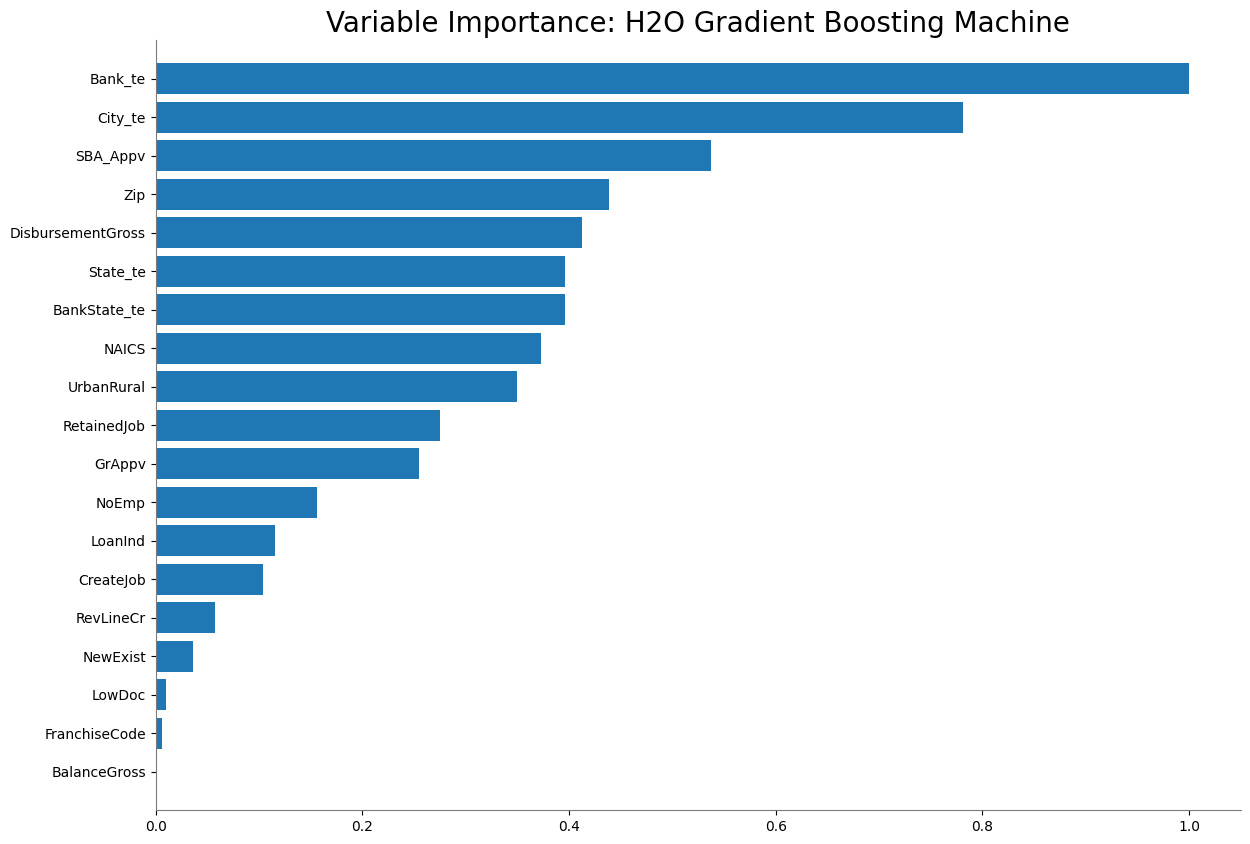

<Figure size 640x480 with 0 Axes>

In [103]:
best_model.varimp_plot(num_of_features=20)

We performed Grid search without cross-validation. Instead we used train/validation/test approach.

Now we can confirm that these parameters are generally sound, by building a GBM model on the whole dataset (instead of the 60%) and using internal 5-fold cross-validation (re-using all other parameters including the seed):

In [104]:
params_list = []
for key, value in best_model.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'final_grid_model_10', 'type': 'Key<Model>', 'URL': '/3/Models/final_grid_model_10'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_31_sid_ab4e', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_31_sid_ab4e'}",
 "validation_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_42_sid_ab4e', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_42_sid_ab4e'}",
 'nfolds = 0',
 'keep_cross_validation_models = True',
 'keep_cross_validation_predictions = False',
 'keep_cross_validation_fold_assignment = False',
 'score_each_iteration = False',
 'score_tree_interval = 10',
 'fold_assignment = None',
 'fold_column = None',
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'MIS_Statu

In [150]:

gbm = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
#get the parameters from the Random grid search model and modify them slightly
params = gbm.params
new_params = {"nfolds":5, "model_id":None, "training_frame":None, "validation_frame":None, 
              "response_column":None, "ignored_columns":None}
for key in new_params.keys():
    params[key]['actual'] = new_params[key] 
gbm_best = H2OGradientBoostingEstimator()

# Set parameters for the new Model to be trained on full dataset
for key in params.keys():
    if key in dir(gbm_best) and getattr(gbm_best,key) != params[key]['actual']:
        setattr(gbm_best,key,params[key]['actual']) 
        

In [151]:

gbm_best.train(x=predictors_gbm, y=response, training_frame=train_bf)
gbm_best.summary()


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,2.0,2.0,23036.0,16.0,16.0,16.0,866.0,957.0,911.5


In [152]:

print(gbm_best.cross_validation_metrics_summary())
        

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.769669  0.00800716  0.771516      0.767758      0.766041      0.760804      0.782225
auc                      0.808697  0.00528465  0.810162      0.801519      0.80895       0.806787      0.816068
err                      0.230331  0.00800716  0.228484      0.232242      0.233959      0.239196      0.217775
err_count                13458     483.447     13383         13575         13695         13959         12678
f0point5                 0.499958  0.0117387   0.502825      0.490684      0.497778      0.48984       0.518662
f1                       0.544589  0.00838369  0.545893      0.531687      0.547557      0.543122      0.554689
f2                       0.59822   0.0118396   0.597028      0.580

In [153]:

cv_summary = gbm_best.cross_validation_metrics_summary().as_data_frame()
perf_cv = gbm_best.model_performance(xval=True)
print(perf_cv.auc())


0.807551133623236


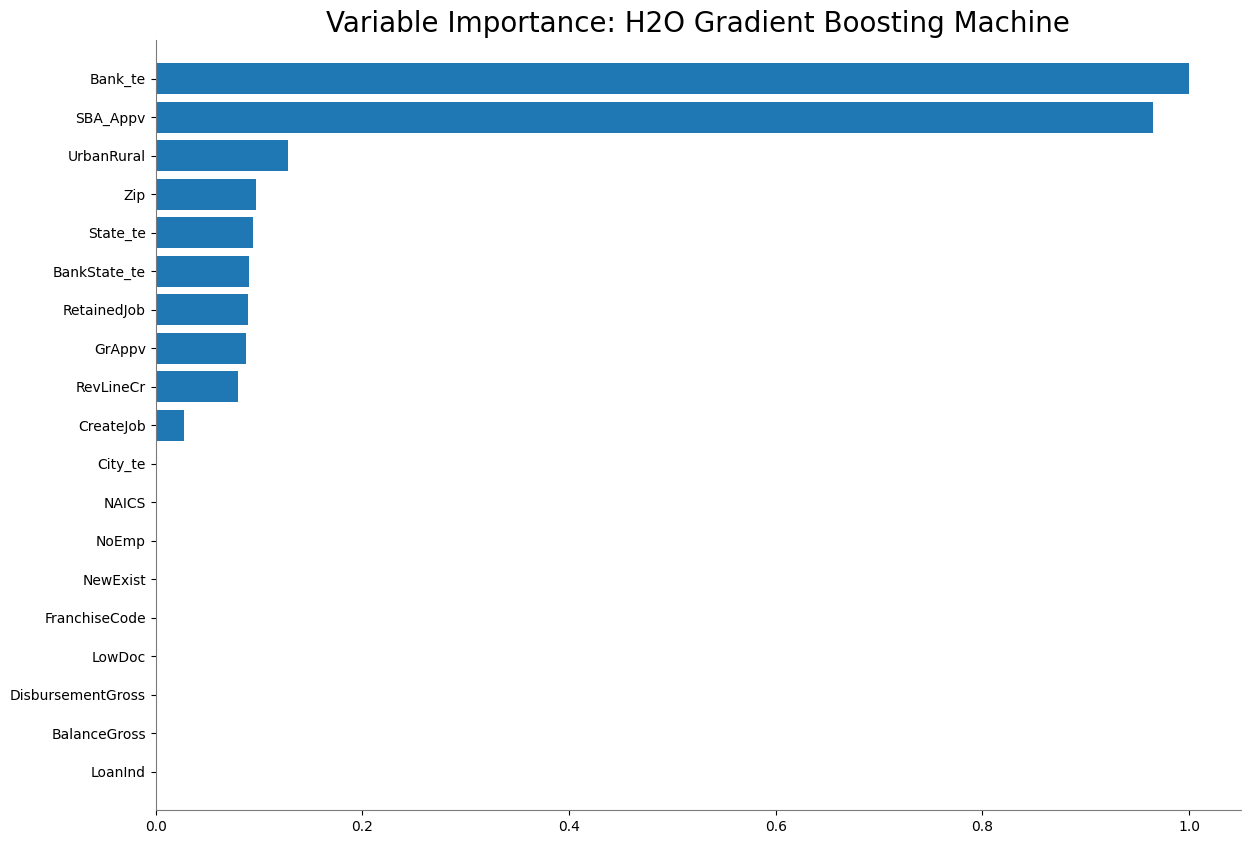

<Figure size 640x480 with 0 Axes>

In [154]:

gbm_best.varimp_plot(num_of_features=20)


As we see, after cross-validation accuracy is slightly incresed compare to random hyper parameter search but working with cross-validation model for further steps of project creating memeory issues so will go wth random grid search hyper parameter tunned model.

# Interpret final trained model using Test dataset:

In [105]:
#Get the best model from the list (the model name listed at the top of the table)
best_gbm = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
best_gbm

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: final_grid_model_10


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    299                299                         2.90773e+06            16           16           16            363           1159          768.813

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11457139451874518
RMSE: 0.338483964935926
LogLoss: 0.3648098284739076
Mean Per-Class Error: 0.22874543137619258
AUC: 0.8682551877232684
AUCPR: 0.667994390572227
Gini: 0.7365103754465367

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30698310854827016
       0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      198270  31052  0.1354   (31052.0/229322.0)
1      20231   42582  0.3221   (20231.0/62813.0)
Total  218501  73634  0.1755   (51283.0/292135.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.306983     0.624154  204
max f2                       0.193189     0.718811  269
max f0point5                 0.418387     0.640959  149
max accuracy                 0.408653     0.843767  153
max precision                0.938485     1         0
max recall                   0.0237675    1         389
max specificity              0.938485     1         0
max absolute_mcc             0.312516     0.513717  201
max min_per_class_accuracy   0.248512     0.78358   236
max mean_per_class_accuracy  0.241047     0.784242  240
max tns                      0.938485     229322    0
max fns                      0.938485     62807     0
max fps                      0.00865673   229322    399
max tps                      0.0237675    62813     389
max tnr                      0.938485     1         0
max fnr                      0.938485     0.999904  0
max fpr                      0.00865673   1         399
max tpr                      0.0237675    1         389

Gains/Lift Table: Avg response rate: 21.50 %, avg score: 21.45 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100022                   0.78718            4.40575    4.40575            0.947296         0.828335   0.947296                    0.828335            0.0440673       0.0440673                  340.575   340.575            0.0433958
2        0.020001                    0.735207           4.12703    4.26641            0.887367         0.760147   0.917337                    0.794247            0.0412653       0.0853327                  312.703   326.641            0.0832264
3        0.0300033                   0.693178           3.92825    4.15368            0.844627         0.713965   0.893098                    0.767483            0.0392912       0.124624                   292.825   315.368            0.120538
4        0.0400021                   0.653896           3.72738    4.04712            0.801438         0.673412   0.870187                    0.74397             0.0372694       0.161893                   272.738   304.712            0.155278
5        0.0500009                   0.617764           3.56816    3.95134            0.767203         0.635154   0.849593 

In [106]:
performance_best_model = best_gbm.model_performance(test_bf)
print("Best Grid Model AUC on Test:",performance_best_model.auc())
print("Best Grid Model AUC on Validation:",best_model.model_performance(valid_bf).auc())

Best Grid Model AUC on Test: 0.8013779887805087
Best Grid Model AUC on Validation: 0.8014957454548465


In [107]:
best_gbm_perf = best_gbm.model_performance(test_bf)
best_gbm_perf.auc()

0.8013779887805087

In [108]:
best_gbm_perf.F1()

[[0.25518941349415397, 0.5355298308103295]]

In [109]:
print("Best accuracy threshold:",best_gbm.model_performance(test_bf).accuracy()[0][0],"\n",
      " Accuracy:",
      best_gbm.model_performance(test_bf).accuracy()[0][1])
print("Best F1 threshold:",best_gbm.model_performance(test_bf).F1()[0][0],"\n",
      " F1:",
      best_gbm.model_performance(test_bf).F1()[0][1])
print("Model AUC:", best_gbm.model_performance(test_bf).auc())
print("Model AUCPR:", best_gbm.model_performance(test_bf).aucpr())
best_gbm.model_performance(test_bf).confusion_matrix()

Best accuracy threshold: 0.4706695023311822 
  Accuracy: 0.8139352651442462
Best F1 threshold: 0.25518941349415397 
  F1: 0.5355298308103295
Model AUC: 0.8013779887805087
Model AUCPR: 0.535881736621653


,0,1,Error,Rate
0,37863.0,11263.0,0.2293,(11263.0/49126.0)
1,4385.0,9021.0,0.3271,(4385.0/13406.0)
Total,42248.0,20284.0,0.2502,(15648.0/62532.0)


# Calculate and plot permutation feature importance

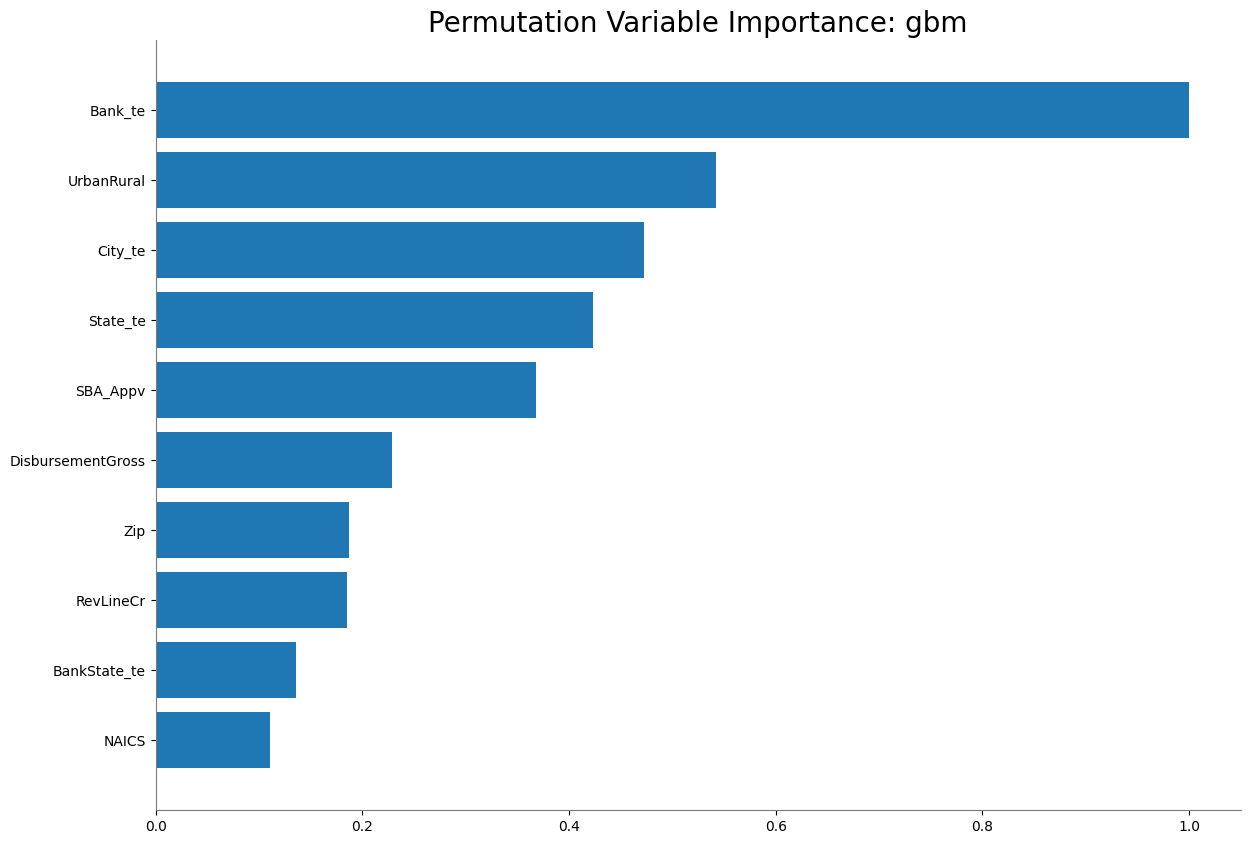

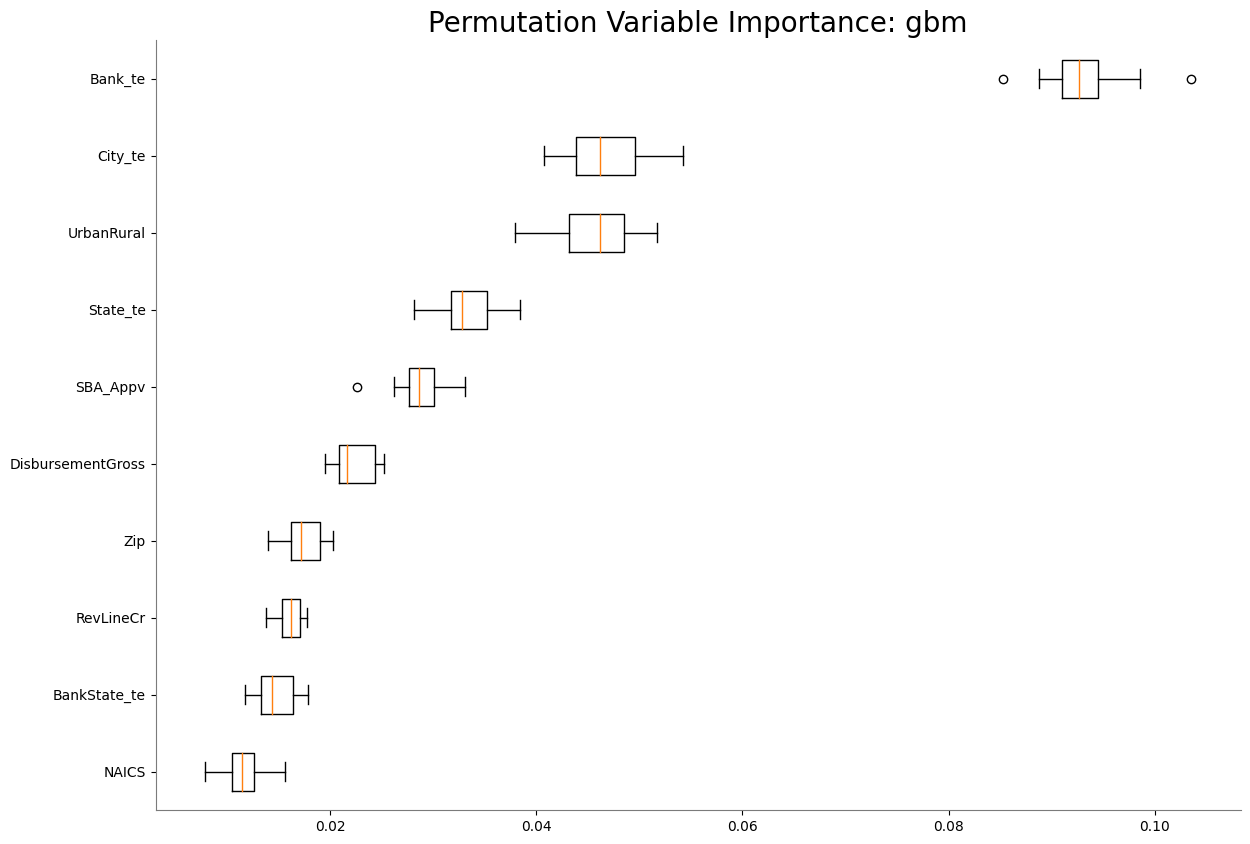

Variable,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10,Run 11,Run 12,Run 13,Run 14,Run 15
Bank_te,0.0887291,0.0889230,0.0925882,0.0912235,0.0913664,0.0906586,0.0938510,0.0852134,0.1035299,0.0961226,0.0985585,0.0938624,0.0924794,0.0945208,0.0943770
UrbanRural,0.0473217,0.0504355,0.0398083,0.0379453,0.0413315,0.0435683,0.0490465,0.0428672,0.0516843,0.0479429,0.0461484,0.0463602,0.0495516,0.0445711,0.0457765
City_te,0.0428727,0.0440597,0.0482385,0.0431335,0.0407674,0.0477777,0.0461598,0.0526277,0.0529202,0.0542556,0.0506922,0.0456229,0.0444177,0.0435630,0.0484972
State_te,0.0374684,0.0366543,0.0335121,0.0317190,0.0327604,0.0384394,0.0327797,0.0319053,0.0317403,0.0311215,0.0332617,0.0281186,0.0312643,0.0373620,0.0338847
SBA_Appv,0.0279918,0.0294452,0.0226308,0.0262511,0.0269371,0.0286179,0.0284403,0.0298013,0.0331350,0.0327613,0.0309102,0.0272857,0.0291834,0.0284013,0.0303159
DisbursementGross,0.0208256,0.0205774,0.0210966,0.0252218,0.0218971,0.0210751,0.0244100,0.0216247,0.0246950,0.0242889,0.0194831,0.0208710,0.0198249,0.0244960,0.0221080
RevLineCr,0.0170835,0.0164322,0.0166324,0.0140319,0.0172137,0.0153285,0.0177452,0.0148334,0.0162412,0.0153343,0.0162695,0.0177044,0.0171965,0.0159451,0.0137623
Zip,0.0154789,0.0172648,0.0144388,0.0179118,0.0186810,0.0139964,0.0203147,0.0171585,0.0163880,0.0160988,0.0171667,0.0193263,0.0199026,0.0197758,0.0164590
BankState_te,0.0132011,0.0124948,0.0143941,0.0134269,0.0123869,0.0146793,0.0176475,0.0117610,0.0161722,0.0179047,0.0161766,0.0138272,0.0176001,0.0166700,0.0142926
NAICS,0.0104275,0.0086602,0.0122326,0.0105306,0.0112711,0.0122307,0.0132087,0.0114862,0.0156485,0.0097437,0.0112076,0.0078891,0.0137702,0.0129991,0.0119722


In [141]:
# calculate importance
permutation_varimp = best_gbm.permutation_importance(test_bf, use_pandas=True)

# plot permutation importance (bar plot)
best_gbm.permutation_importance_plot(test_bf)

# plot permutation importance (box plot)
best_gbm.permutation_importance_plot(test_bf, n_repeats=15)

Important features are State_te,Bank_te,City_te,UrbanRural,SBA_app

Global feature importance using Shapley values and Summary plot with Shapley values


In [112]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [113]:
import shap

In [114]:
# load JS visualization code to notebook
shap.initjs()

In [87]:
shapley_contribs = best_gbm.predict_contributions(test_bf[0:100,:])
shapley_contribs = test_bf[response][0:100,:].cbind(shapley_contribs)
shapley_contribs.head()

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


MIS_Status,City_te,State_te,Bank_te,BankState_te,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,BiasTerm
0,-0.150822,0.0316705,-0.0361335,0.00730761,-0.0742219,-0.0623298,-0.00153833,-0.0397496,0.00385177,0.00124463,-1.18684e-05,-0.574013,0.0061977,0.00405802,0.0108448,0,-0.0401028,-0.274183,-5.66767e-05,-1.37209
0,-0.135298,0.025732,-0.388009,0.00338259,0.00471153,0.00476736,-0.00481007,0.0678289,0.00166032,-0.00193316,-1.94733e-05,0.0688684,0.00901655,0.00247496,0.00662058,0,-0.0565575,-0.250244,-1.43437e-05,-1.37209
0,-0.126756,-0.0839326,-0.175981,-0.0421372,-0.0639151,-0.0536002,0.0003405,-0.0100308,0.00156953,-0.000238398,-0.00028952,-0.583805,0.00279523,0.0061959,0.0146564,0,0.0194343,0.105823,0.00123719,-1.37209
0,-0.127953,-0.0663601,-0.000874662,-0.00717411,-0.0816673,5.47427e-05,0.000369074,-0.0104985,0.00262087,0.000266873,-3.37725e-05,-0.611936,0.00815495,-0.1556,0.0198966,0,0.00596142,0.0406961,-0.000481739,-1.37209
1,-0.0480543,0.140791,-0.143828,0.0143021,0.0346699,-0.0300429,-0.000143206,0.0121295,0.000597591,0.00364417,-1.1828e-05,0.17116,0.0202333,0.000884665,-0.000816549,0,0.0344117,0.12638,0.000139644,-1.37209
1,-0.141537,0.0712207,0.0568698,0.00122896,0.0162981,0.0198354,0.000574834,-0.00931246,0.00110399,0.00479138,-4.00895e-06,0.173026,-0.00385144,0.00161294,0.0453098,0,0.0363469,0.179804,-5.68526e-05,-1.37209
0,-0.200129,0.10666,-0.100772,0.0130853,-0.000347639,0.0151072,-0.0124062,0.0938195,-0.00948074,7.38974e-05,-7.67665e-06,0.136985,0.000904512,0.00083525,0.00256034,0,-0.0512607,-0.213133,-0.000113433,-1.37209
0,-0.17032,0.15916,0.464855,-0.022772,0.000315462,0.0110043,0.000713363,-0.00858013,0.00229105,0.00238906,-4.00895e-06,0.176167,0.0232454,0.00526895,-0.0383423,0,0.0721527,0.143342,-8.64416e-05,-1.37209
0,-0.295765,0.00156853,-0.326054,0.0109405,-0.0259744,0.00741762,-0.000452715,-0.00885972,0.00130227,-0.00153089,-7.67665e-06,0.0935216,-0.00613032,0.00119825,0.00675381,0,0.00222308,0.0756095,0.000139167,-1.37209
1,0.296491,-0.0875565,0.415834,-0.0314703,-0.00770514,-0.0479459,-0.000663457,-0.00977295,0.00113465,-0.000666058,-1.18148e-05,0.161961,-0.0294309,0.0036978,0.0231931,0,0.0380953,0.165508,0.000110289,-1.37209


In [115]:
def examine_all_reason_codes(data, model):

    shap_contribs = model.predict_contributions(data)

    col_mapping = {}
    for i in data.col_names:
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols

    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)

    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    X = data.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)

    return shap.summary_plot(shap_contribs[shap_cols].values,
                             X[shap_cols].values,
                             feature_names=shap_cols
                             )

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


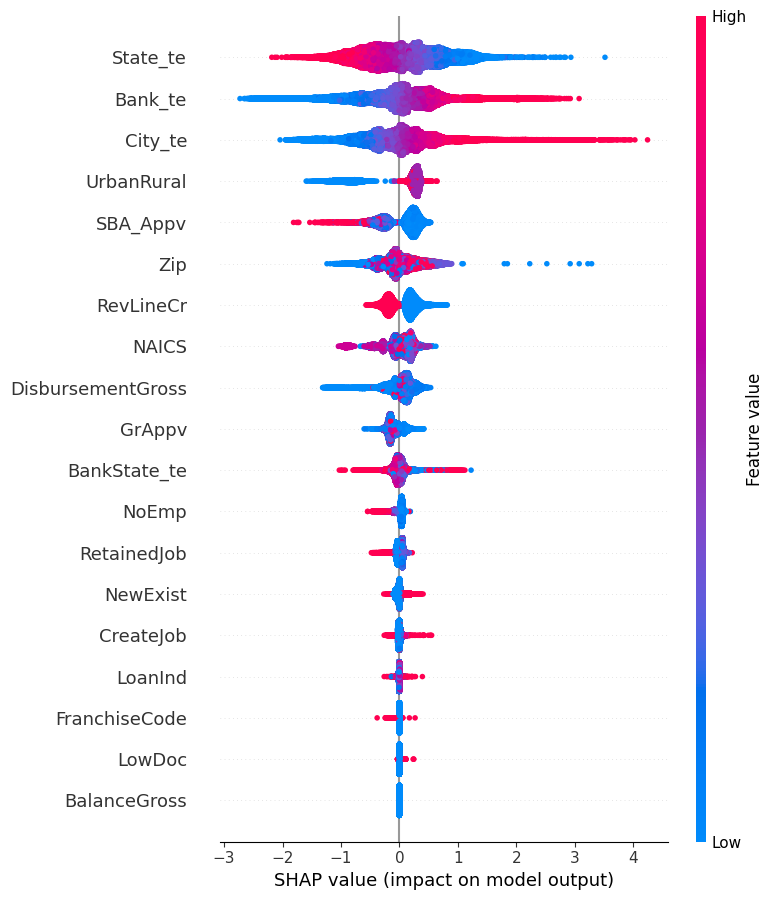

In [116]:
examine_all_reason_codes(test_bf,best_gbm)


Important features are State_te,Bank_te,City_te,UrbanRural,SBA_app

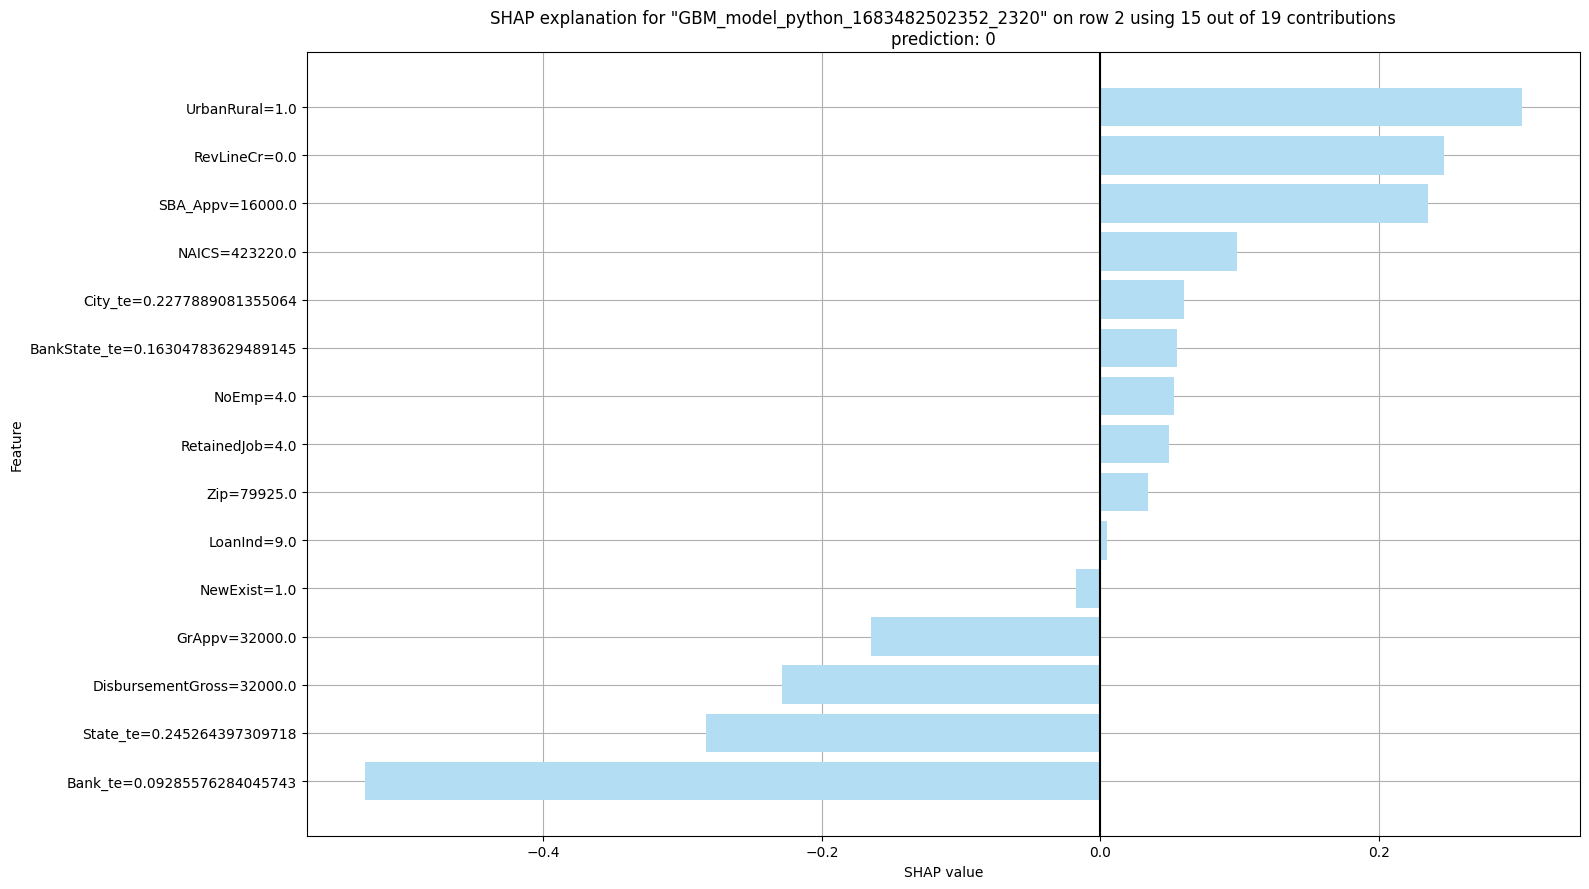

In [142]:
# Using H2O method
best_gbm.shap_explain_row_plot(train, row_index=2) #, plot_type="breakdown")
#UrbanRural;for urban area shows positive impact on prediction.

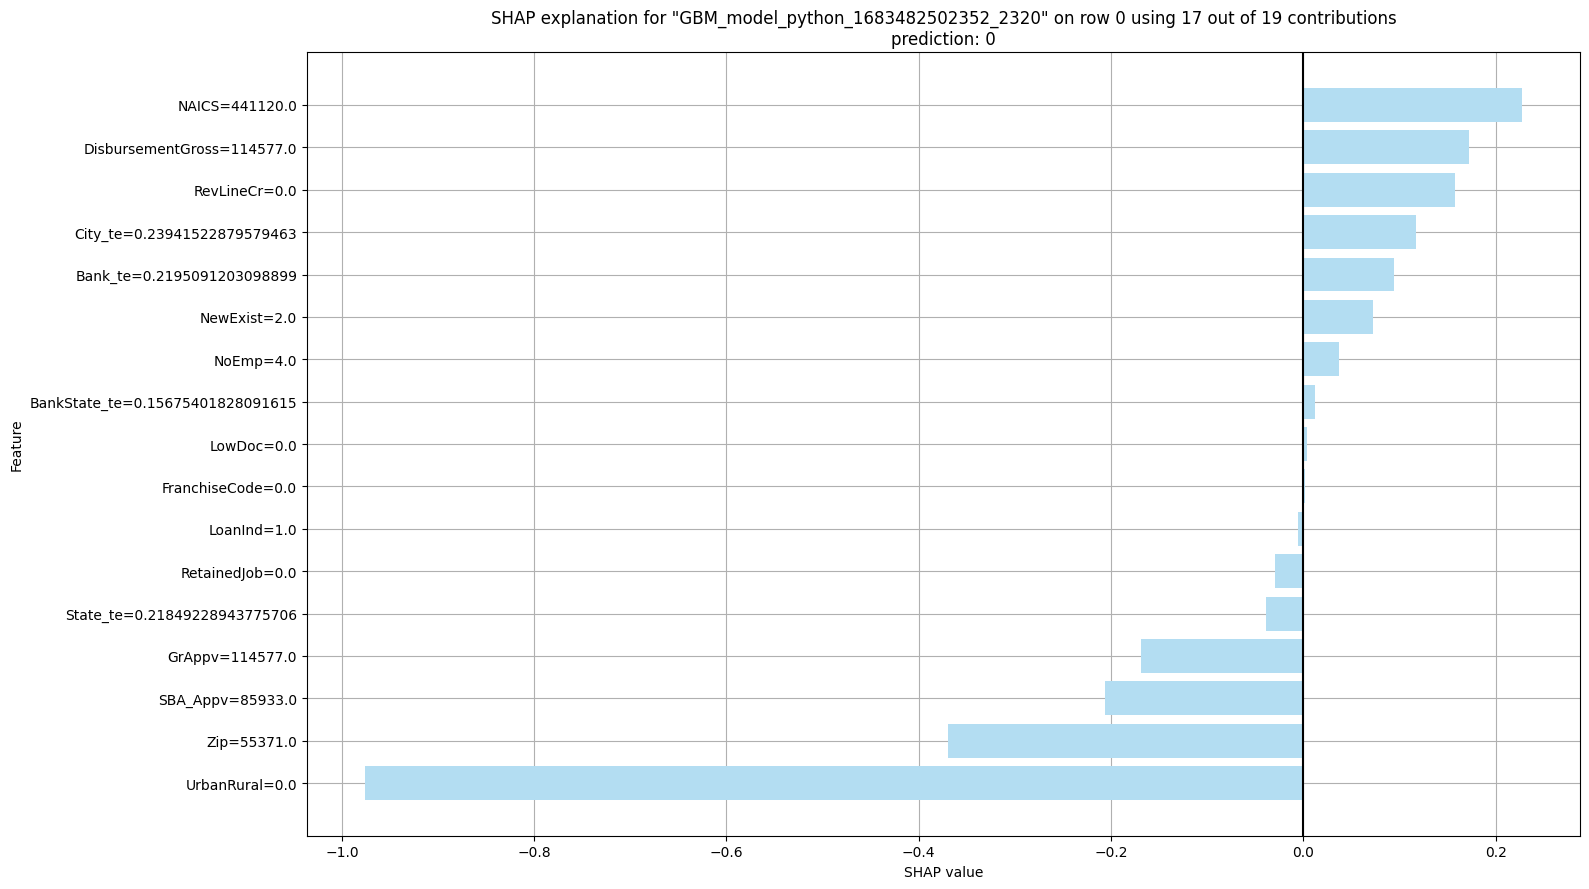

In [144]:
# Using H2O method
best_gbm.shap_explain_row_plot(train, row_index=0) #, plot_type="breakdown")
#NAICS positive impact on stauts

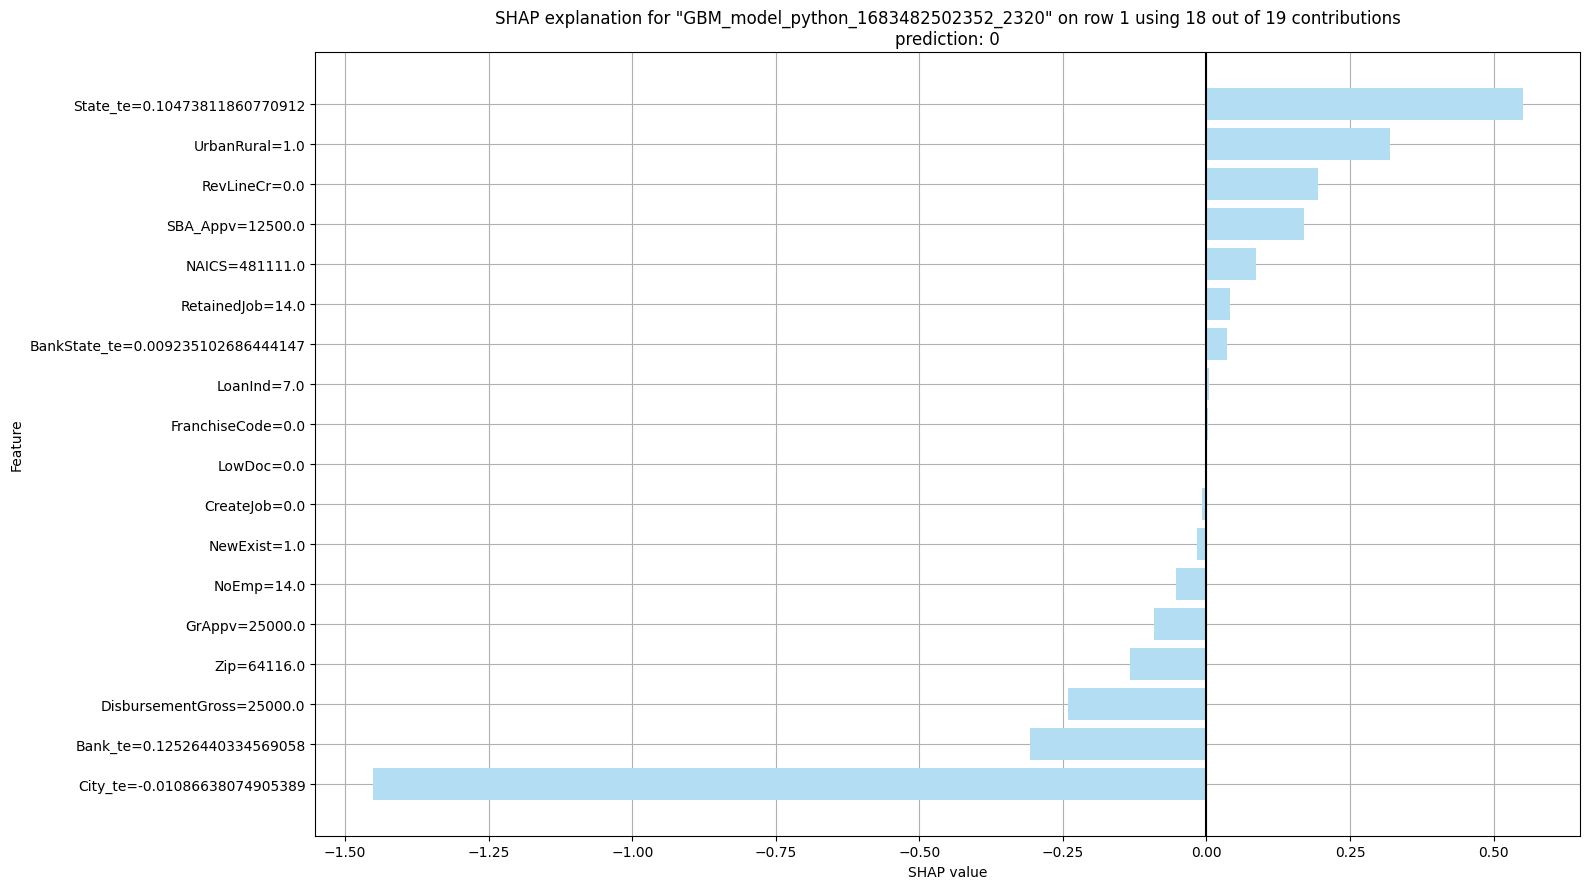

In [145]:
# Using H2O method
best_gbm.shap_explain_row_plot(train, row_index=1) #, plot_type="breakdown")

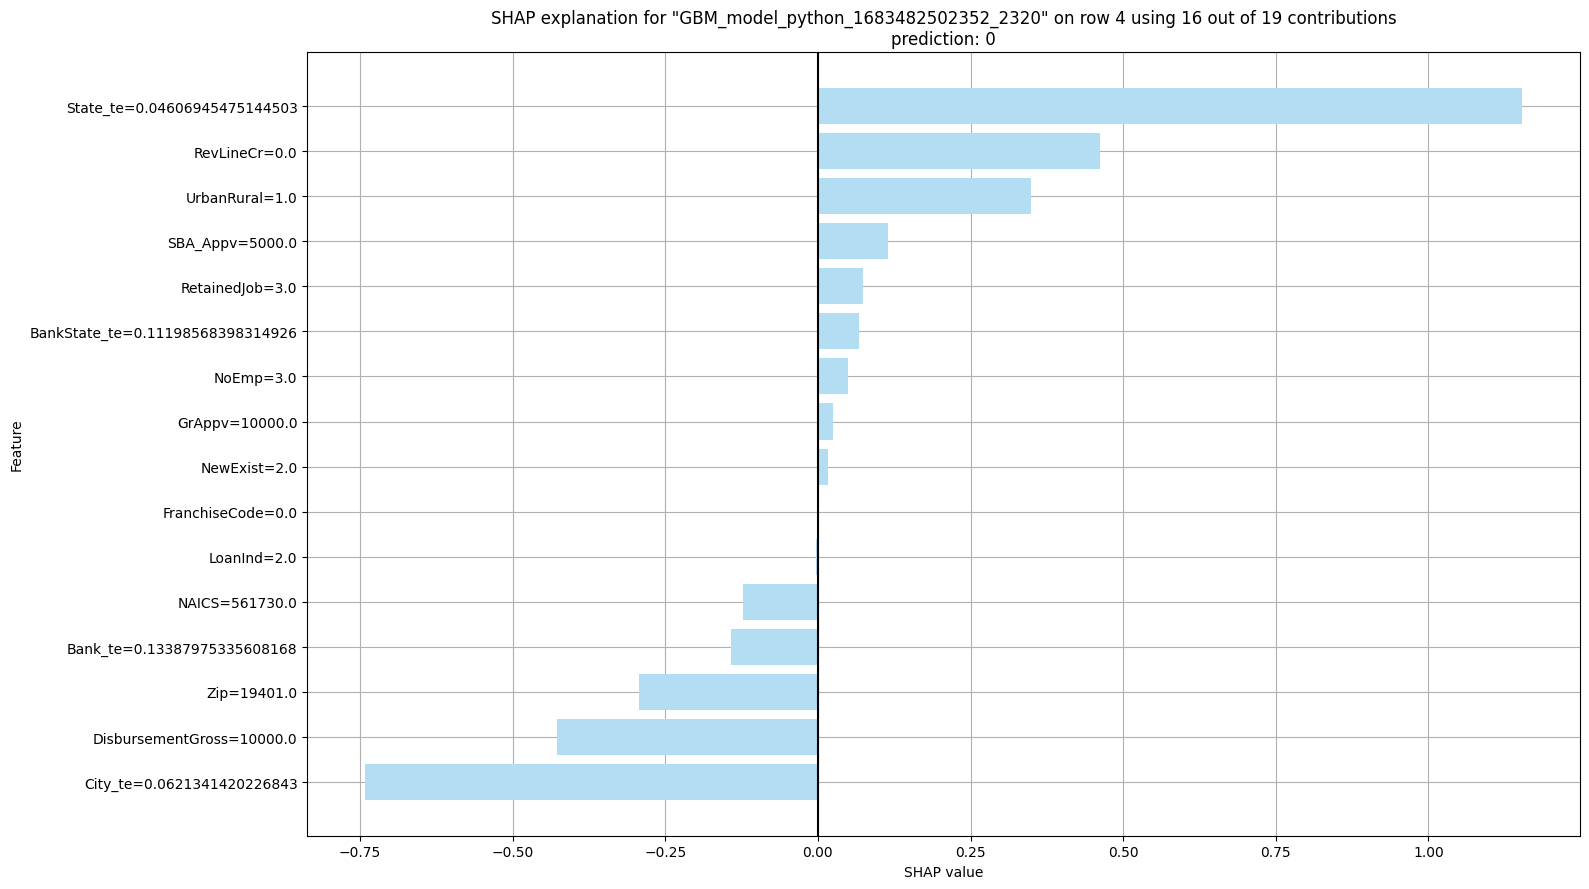

In [146]:
# Using H2O method
best_gbm.shap_explain_row_plot(train, row_index=4) #, plot_type="breakdown")
#State_te,RevLin positive impact;

In [129]:
surrogate_dt_data = best_gbm.predict(test_bf).cbind(test)
surrogate_dt_data.head(50)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1,City_te,State_te,Bank_te,BankState_te,City,State,Bank,BankState,index,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status,UrbanRural_cut,RevLineCr_cut,FranchiseCode_cut,LowDoc_cut,NewExist_cut,RetainedJob_cut,CreateJob_cut,NewExist_cut_RetainedJob_cut_CreateJob_cut,NewExist_cut_RetainedJob_cut_CreateJob_cut0
0,0.95954,0.0404597,0.223957,0.170447,0.201259,0.158171,NASHUA,IA,FIRST NATIONAL BANK,IA,5,50658,541940,9,1,0,0,0,0,0,0,150000,0,150000,112500,7,0,UrbanRural_0,RevLineCr_0,FranchiseCode_0,LowDoc_0,NewExist_0,RetainedJob_0,CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0
0,0.95652,0.04348,0.215014,0.196516,-0.0135743,0.221424,BOYES HOT SPRINGS,CA,WESTAMERICA BANK,CA,32,95476,115116,15,2,0,0,0,1,0,0,176000,0,176000,132000,6,0,UrbanRural_0,RevLineCr_0,FranchiseCode_0,LowDoc_0,NewExist_0,RetainedJob_0,CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0
0,0.945256,0.0547438,0.20624,0.30461,0.0972279,0.329518,SAN FRANCISCO,CA,CITIBANK INTERNATIONAL,CA,49,94104,541310,1,1,0,0,0,0,1,0,57103,0,28000,14000,1,0,UrbanRural_0,RevLineCr_0,FranchiseCode_0,LowDoc_0,NewExist_0,RetainedJob_0,CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0
0,0.976835,0.0231648,0.259216,0.341537,0.241032,0.341663,CROTON,OH,HEARTLAND BANK,OH,87,43013,234110,6,1,0,0,0,0,0,1,66000,0,66000,52800,4,0,UrbanRural_0,RevLineCr_0,FranchiseCode_0,LowDoc_0,NewExist_0,RetainedJob_0,CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0
1,0.632188,0.367812,0.211616,0.103929,0.0922819,0.096973,HURRICANE,UT,ZIONS FIRST NATIONAL BANK,UT,95,84737,621310,7,2,0,7,0,2,1,0,52096,0,25000,12500,2,1,UrbanRural_0,RevLineCr_0,FranchiseCode_0,LowDoc_0,NewExist_0,RetainedJob_0,CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0
0,0.707412,0.292588,0.0964543,0.150445,0.254853,0.26981,KIMBERLY,ID,BANK OF AMERICA NATL ASSOC,NC,108,83341,447190,4,1,0,4,0,1,1,0,84305,0,50000,25000,4,1,UrbanRural_0,RevLineCr_0,FranchiseCode_0,LowDoc_0,NewExist_0,RetainedJob_0,CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0
0,0.791392,0.208608,0.0988402,0.0769318,0.114248,0.0770569,Hilliard,OH,"PNC BANK, NATIONAL ASSOCIATION",OH,115,43026,722110,30,2,25,30,0,1,0,0,248700,0,248700,124350,2,0,UrbanRural_0,RevLineCr_0,FranchiseCode_0,LowDoc_0,NewExist_0,RetainedJob_0,CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0
1,0.668753,0.331247,0.142997,0.147162,0.435131,0.421004,HAUGHTON,LA,CAPITAL ONE NATL ASSOC,VA,124,71037,484110,1,1,2,1,0,1,0,0,10000,0,10000,8500,4,0,UrbanRural_0,RevLineCr_0,FranchiseCode_0,LowDoc_0,NewExist_0,RetainedJob_0,CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0
0,0.908395,0.0916054,0.043325,0.20413,0.0705711,0.208591,TOMS RIVER,NJ,SANTANDER BANK NATL ASSOC,DE,125,8757,447190,10,1,0,10,0,1,0,0,75000,0,75000,37500,1,0,UrbanRural_0,RevLineCr_0,FranchiseCode_0,LowDoc_0,NewExist_0,RetainedJob_0,CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0
0,0.738065,0.261935,0.402506,0.32202,0.450904,0.404258,XENIA,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,153,45384,561730,18,1,0,18,0,1,1,0,48782,0,50000,25000,3,1,UrbanRural_0,RevLineCr_0,FranchiseCode_0,LowDoc_0,NewExist_0,RetainedJob_0,CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0,NewExist_0_RetainedJob_0_CreateJob_0


In [119]:
# The function is to calculate Shapley values (contributions) and plot them for single record
def examine_indiv_reason_codes(record, model, use_matplotlib=True):
    
    shap_contribs = model.predict_contributions(record)
    
    col_mapping = {}
    for i in record.col_names: 
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols
            
    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)
        
    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    X = record.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)
    
    return shap.force_plot(bias_term, 
                           shap_contribs[shap_cols].values, 
                           X[shap_cols].values, 
                           shap_cols,
                           link="logit",
                           matplotlib=use_matplotlib
                          )

Label 0 is correctly identified
Label 0 is identified as 1
Label 1 is correctly identified
Label 1 is identified as 0

In [120]:
#The non matplotlib version produces better graphics but cannot be saved with notebook
examine_indiv_reason_codes(test_bf[5, :], best_gbm, use_matplotlib=False) # y=0,predict=0 coorect 0

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [121]:
#The non matplotlib version produces better graphics but cannot be saved with notebook
examine_indiv_reason_codes(test_bf[32, :], best_gbm, use_matplotlib=False)# y=0,predict=0 coorect 0

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [122]:

#The non matplotlib version produces better graphics but cannot be saved with notebook
examine_indiv_reason_codes(test_bf[124, :], best_gbm, use_matplotlib=False)#Label 0 is identified as 1

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [128]:
#The non matplotlib version produces better graphics but cannot be saved with notebook
examine_indiv_reason_codes(test_bf[806951, :], best_gbm, use_matplotlib=False)#Label 0 is identified as 1

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [130]:
#The non matplotlib version produces better graphics but cannot be saved with notebook
examine_indiv_reason_codes(test_bf[652, :], best_gbm, use_matplotlib=False)#Label 1 is correctly identified 1

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [131]:
#The non matplotlib version produces better graphics but cannot be saved with notebook
examine_indiv_reason_codes(test_bf[531, :], best_gbm, use_matplotlib=False)#Label 1 is correctly identified 1

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [132]:
#The non matplotlib version produces better graphics but cannot be saved with notebook
examine_indiv_reason_codes(test_bf[606, :], best_gbm, use_matplotlib=False)#Label 1 is identified as 0

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [133]:
#The non matplotlib version produces better graphics but cannot be saved with notebook
examine_indiv_reason_codes(test_bf[153, :], best_gbm, use_matplotlib=False)#Label 1 is identified as 0

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


# Saving artifacts

In [ ]:
#saving target encoder
target_enc_H2O = h2o.save_model(model=data_te, path="Project_2_artifacts", force=True)


In [136]:
# save the model
model_gbm_H2O = h2o.save_model(model=best_gbm, path="Project_2_artifacts", force=True)



# Conclusion:



The top five features by level of importance are State,Bank,Urban_rular,SBA_approv and bank state.
I could dig into in regard to the feature importances, but these are a few of the things I noticed right away, some of which I didn't expect. One thing I wanted to try was seeing if reducing the number of features used to the most important ones would have a positive impact on the model performance, since the current model has a high level of dimensionality.

Job creation played a much larger role in this model, which is interesting to see. Perhaps onboarding new employees is more expensive, which puts a strain on the business's bottom line and therefore ability to repay the loan. I also find it interesting that the loans which were part of the Low Doc program was selected as a most important feature, however it apparently shows zero importance here.

Despite all of the data provided here, there is something else that isn't captured in this data that is arguably the most important and relevant factor in determining the ability of a business to repay the loan: the business owner(s) and the business operations themselves! Although the industry does have some weight in this aspect, the data doesn't include the cash flow of each business, working capital, existing debt they had prior to applying for the SBA loan, etc. The data also can't capture the personality, attitude and drive of a business owner to make the business successful. One of the most important factors we used when underwriting loan applications during my time as a Credit Analyst was the character of the business owner(s). A business can be very successful, but at the end of the day if the owner doesn't want to pay the loan they won't. It's a sad truth, but it happens more often than you'd think.